# Introduction to Wavelet Analysis

Wavelet analysis is a great tool for analyzing non-stationary signals, where the frequency content changes over time. Unlike the Fourier Transform, which decomposes a signal into its frequency components over the entire time domain, the Wavelet Transform allows us to analyze the signal at different time scales, making it particularly useful for signals that have transient features, or when the frequency content is not constant throughout the signal.

In this example, we will walk through the process of applying a continuous wavelet transform (CWT) to a signal that consists of two different frequency components. The goal is to identify which frequencies are present and when they dominate throughout the time series.

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Step 1**: Creating the Time Series

First, we generate a simple time series that combines two different frequency components: 2 Hz and 5 Hz. This will help illustrate how the wavelet transform can capture both frequencies and their dominance at different points in time.

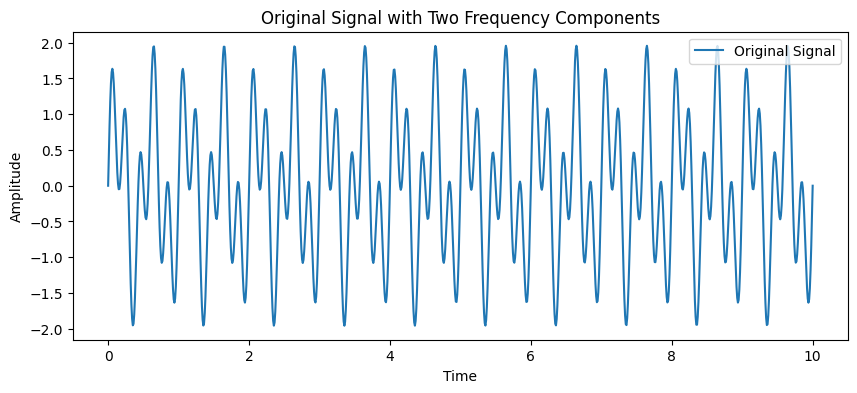

In [17]:

# Create a simple time series
t = np.linspace(0, 10, 1000)  # Time axis
f1 = 2  # Frequency 1
f2 = 5  # Frequency 2

# Generate a time series with two different frequency components
signal_data = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal_data, label='Original Signal')
plt.title('Original Signal with Two Frequency Components')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In the plot, you can observe that the time series is a combination of two waveforms. The slower oscillations correspond to the 2 Hz frequency, while the faster oscillations represent the 5 Hz frequency component. 

### **Step 2**: Applying the Continuous Wavelet Transform (CWT)

Next, we apply the Wavelet Transform to the time series. We use a Morlet Wavelet, which is one of the most commonly used wavelets due to its ability to balance time and frequency localization. We define its parameters and plot both its real and imaginary parts.

`fs` (Sampling rate): This defines how many samples per second are used. In this case, we use 1000 samples per second.

`n_cycles`: The number of cycles that the wavelet will contain. Here, the wavelet will oscillate 5 times before tapering off.

`freq`: The fundamental frequency of the wavelet (in Hz). We set this to 5 Hz, meaning the wavelet oscillates at 5 Hz.

`omega`: This corresponds to the central frequency of the wavelet, which controls how many cycles are included.

`wavelet_len`: This calculates the length of the wavelet in terms of samples, based on the number of cycles and the sampling rate.

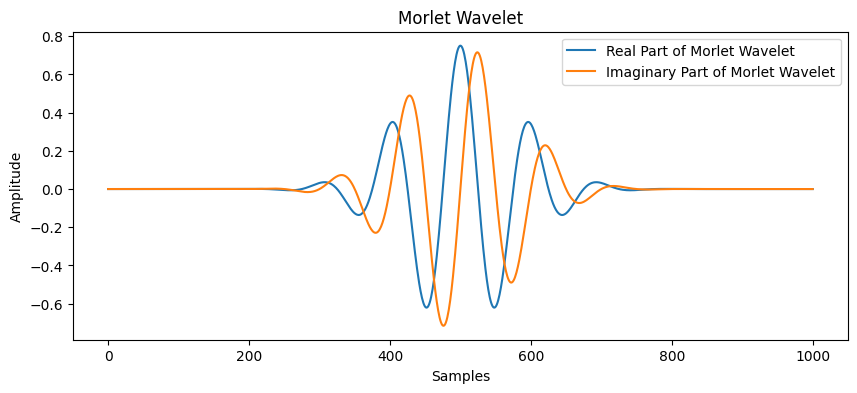

In [18]:

# Define parameters
fs = 1000  # Sampling rate (samples per second)
n_cycles = 5  # Number of cycles in the wavelet
freq = 5  # Fundamental frequency of the wavelet (Hz)
scaling = 1.0  # Scaling factor
omega = n_cycles  # Central frequency of the wavelet
wavelet_len = int(n_cycles * fs / freq)  # Length of the wavelet

# Create the Morlet wavelet using SciPy
wavelet = signal.morlet(wavelet_len, w=omega, s=scaling)

# Plot the real part of the Morlet wavelet
plt.figure(figsize=(10, 4))
plt.plot(np.real(wavelet), label='Real Part of Morlet Wavelet')
plt.plot(np.imag(wavelet), label='Imaginary Part of Morlet Wavelet')
plt.title('Morlet Wavelet')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



### **Step 3**: Sliding the Morlet Wavelet over the Signal

This code visualizes how the Morlet wavelet is "slid"/shifted over the original signal at different positions along the time axis.

**Original Signal**: The signal is first plotted in black to serve as the background over which the wavelet will be placed.

**Wavelet Positions**: We define four positions (positions = [200, 400, 600, 800]) along the time axis where the Morlet wavelet will be centered.
    
**Sliding the Wavelet**: At each position, the wavelet is overlaid on the signal, showing how it fits at different parts.

**Result**: The plot visualizes how the wavelet captures different sections of the signal.

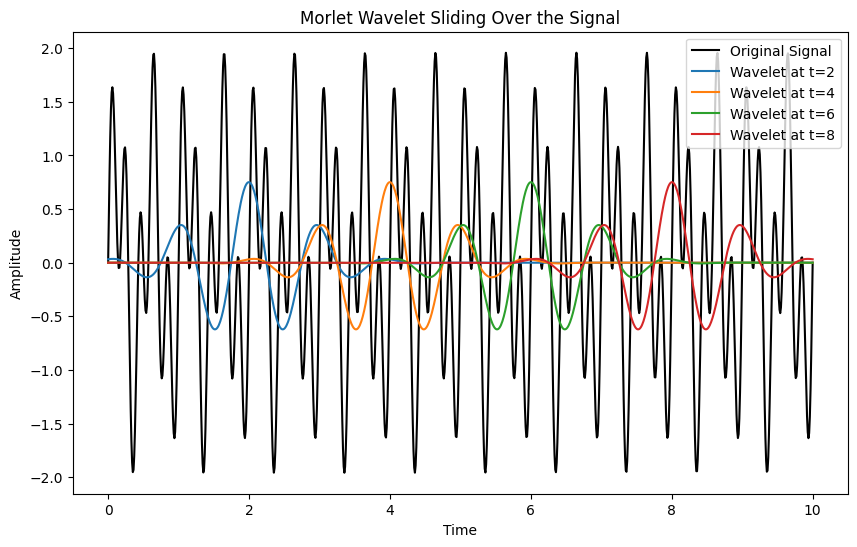

In [24]:

# Plot the original signal with the wavelet sliding over it
plt.figure(figsize=(10, 6))
plt.plot(t, signal_data, label='Original Signal', color='black')

# Define positions for the wavelet to be centered at
positions = [200, 400, 600, 800]  # Positions along the time axis where the wavelet will be centered

# Plot the Morlet wavelet at several positions over the signal
for center in positions:
    shifted_wavelet = np.zeros_like(signal_data)
    
    # Place the wavelet centered at 'center' by adding it to the correct portion of the signal
    start = max(0, center - wavelet_len // 2)
    end = min(len(signal_data), center + wavelet_len // 2)
    wavelet_start = max(0, wavelet_len // 2 - center)
    wavelet_end = wavelet_start + (end - start)
    
    shifted_wavelet[start:end] = np.real(wavelet[wavelet_start:wavelet_end]) 
    
    # Plot the shifted wavelet over the signal
    plt.plot(t, shifted_wavelet, label=f'Wavelet at t={t[center]:.0f}', alpha=1) # show time where wavelet is centred

plt.title('Morlet Wavelet Sliding Over the Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


The Morlet wavelet retains two key pieces of information at each time point:

1. Amplitude: How strongly the frequency component matches the signal at that position.

2. Frequency: Which frequencies are present in that segment of the signal.

This allows the wavelet to capture both the strength and the specific frequencies in different parts of the signal, which can later be used to create a time-frequency representation.


### **Step 4**: Wavelet Power Spectrum

We perform the Continuous Wavelet Transform (CWT) on the signal using the Morlet wavelet. This gives us a time-frequency representation of the signal, allowing us to see which frequencies are dominant at different points in time.

Explanation of Code:

**Sampling Rate (fs)**: This is the number of samples per second for the signal, in this case, 100 samples per second.

**Scales (widths)**: The scales determine how much the wavelet is stretched or compressed. By defining a range of scales (np.arange(1, 128)), we allow the wavelet to adapt to different frequencies, so we can capture various details of the signal across time.

**Continuous Wavelet Transform (CWT)**: We use the Morlet wavelet to perform the CWT. The signal.cwt() function applies the wavelet over the signal at different scales and produces a CWT matrix. This matrix contains coefficients that represent the strength of different frequencies at different times.

**Wavelet Power**: The magnitude of the wavelet coefficients is squared (power = np.abs(cwt_matrix) ** 2) to compute the wavelet power. This power indicates how strongly different frequencies are present in the signal at various times.

**Frequencies**: Since the scales correspond to specific frequencies, we convert them into actual frequency values (frequencies = fs / widths), which makes the interpretation more intuitive.

**Visualization**: Finally, we plot the Wavelet Power Spectrum as a contour plot. The x-axis represents time, while the y-axis represents frequency (in Hz). The color intensity indicates the strength (power) of the frequencies at different times. Higher intensity colors represent stronger power at those frequencies.

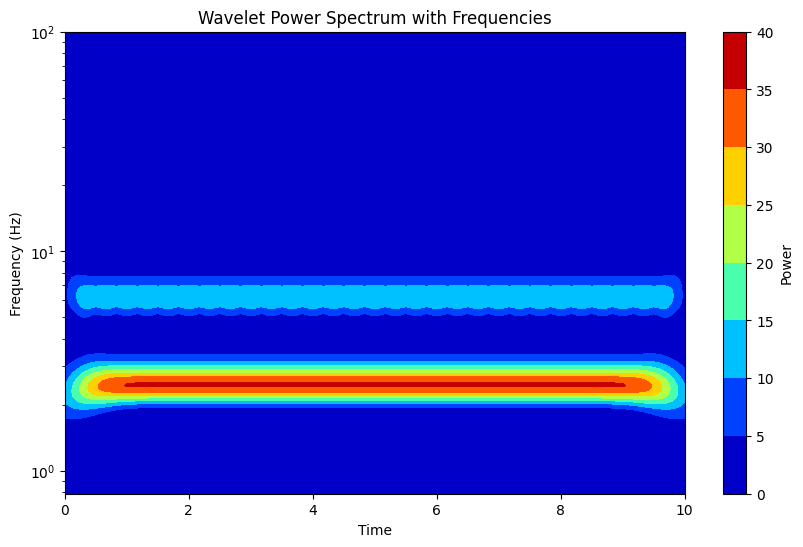

In [23]:
fs = 100  # Sampling rate (samples per second)
# Define parameters for the Wavelet Transform
widths = np.arange(1, 128)  # Range of scales for the wavelet transform

# Perform the Continuous Wavelet Transform (CWT) using the Morlet wavelet
cwt_matrix = signal.cwt(signal_data, signal.morlet2, widths)

# Compute the wavelet power (magnitude squared of the coefficients)
power = np.abs(cwt_matrix) ** 2

# Convert scales to frequencies
frequencies = fs / widths

# Visualize the Wavelet Power Spectrum with frequencies on the y-axis
plt.figure(figsize=(10, 6))
plt.contourf(t, frequencies, power, cmap='jet')
plt.title('Wavelet Power Spectrum with Frequencies')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.yscale('log')  # Use logarithmic scale for frequency
plt.show()

### Conclusion

In the Wavelet Power Spectrum shown above, we observe two dominant frequency bands:

2 Hz (Lower band): This frequency is clearly visible as a strong signal in the lower part of the plot. This component persists throughout the entire time range, which aligns with what we observed in the original time series. The 2 Hz component has the highest power and dominates the signal.

5 Hz (Upper band): The second prominent frequency appears around 5 Hz, seen as a distinct band in the upper part of the plot. This frequency is also present consistently across the entire time range, though with slightly less power compared to the 2 Hz component.

The Wavelet Power Spectrum effectively shows how both frequencies (2 Hz and 5 Hz) are continuously present throughout the signal. The persistent bands in the time-frequency domain reveal that there are no significant changes in the dominance of these frequencies over time, which is consistent with the characteristics of the signal we generated earlier.


**<p style="color:royalblue;">In the following example, we generate a signal that contains both a 2 Hz and a 5 Hz component during the first half of `signal_data`. In the second half, only the 2 Hz signal remains. This allows us to observe how the wavelet spectrum changes over time as the 5 Hz component disappears.</p>**

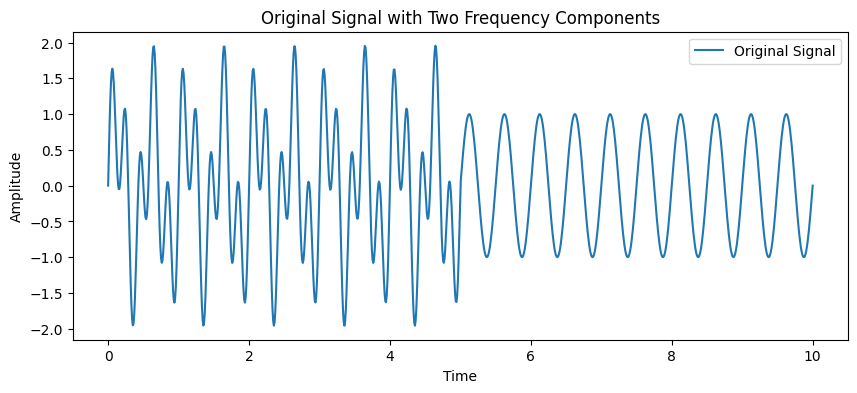

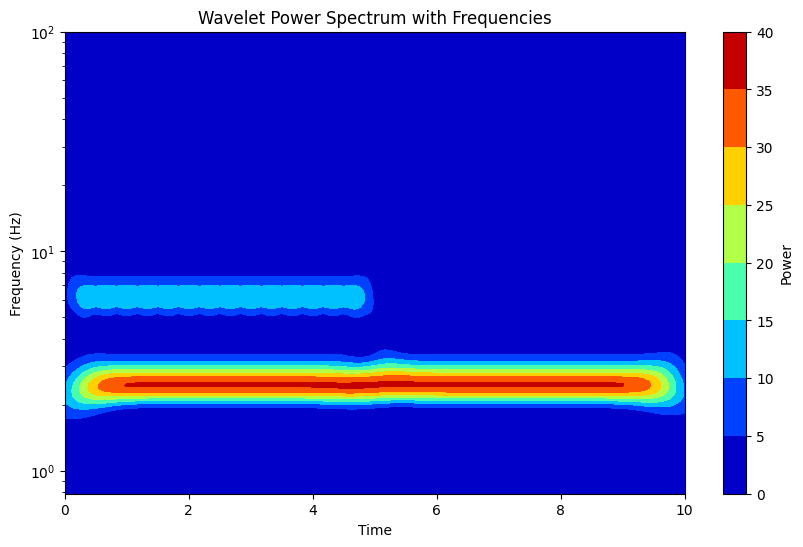

In [25]:
# Create a simple time series
t = np.linspace(0, 10, 1000)  # Time axis
f1 = 2  # Frequency 1 (2 Hz)
f2 = 5  # Frequency 2 (5 Hz)
fs = 100  # Sampling rate (samples per second)

# Generate a time series with two different frequency components
# 2 Hz signal for the entire duration
signal_data = np.sin(2 * np.pi * f1 * t)

# 5 Hz signal only for the first half of the time, then 0 for the second half
signal_data[:500] += np.sin(2 * np.pi * f2 * t[:500])
signal_data[500:] += 0  # Zero for the second half

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal_data, label='Original Signal')
plt.title('Original Signal with Two Frequency Components')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Define parameters for the Wavelet Transform
widths = np.arange(1, 128)  # Range of scales for the wavelet transform

# Perform the Continuous Wavelet Transform (CWT) using the Morlet wavelet
cwt_matrix = signal.cwt(signal_data, signal.morlet2, widths)

# Compute the wavelet power (magnitude squared of the coefficients)
power = np.abs(cwt_matrix) ** 2

# Convert scales to frequencies
frequencies = fs / widths

# Visualize the Wavelet Power Spectrum with frequencies on the y-axis
plt.figure(figsize=(10, 6))
plt.contourf(t, frequencies, power, cmap='jet')
plt.title('Wavelet Power Spectrum with Frequencies')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.yscale('log')  # Use logarithmic scale for frequency
plt.show()


References:

Mallat, S. (1999). ***A Wavelet Tour of Signal Processing.***  
- covers the theory and applications of wavelets in signal processing.

Torrence, C., & Compo, G. P. (1998). ***A Practical Guide to Wavelet Analysis.*** Bulletin of the American Meteorological Society.
- explanation of wavelet analysis, including continuous wavelet transforms, with a focus on geophysical data.

Addison, P. S. (2002). ***The Illustrated Wavelet Transform Handbook.***

[Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html)

[NeuroDSP - Neuro Digital Signal Processing Toolbox](https://neurodsp-tools.github.io/neurodsp/auto_tutorials/timefreq/plot_MorletWavelet.html)
- Some code snippets and insights were adapted from this tutorial on using the Morlet wavelet for time-frequency analysis.

And of course the [PyCWT-Toolbox](https://github.com/regeirk/pycwt?tab=readme-ov-file#readme)

